In [279]:
import numpy as np
import matplotlib.pyplot as plt



class Data:
    def __init__(self):
        self.m = 0.005097   #Mass
        self.g = 981
        self.H0 = 0
        self.L = 2420
        self.XB = 2000
        self.EA = 16.5e+6 * 0.5
        self.Iter = 200
        self.Tol = 1e-9
        self.InitialGuess_H = 100
        self.InitialGuess_V = 150

In [280]:
def Residue(DATA, X):
    mg = DATA.m * DATA.g
    EA = DATA.EA
    H = X[0]
    V = X[1]
    RES = np.zeros(2)
    RES[0] = H / mg * (np.arcsinh(V / H) - np.arcsinh((V - mg * DATA.L) / H)) + H * DATA.L / EA - DATA.XB
    RES[1] = H / mg * (-np.sqrt(1 + ((V - mg * DATA.L) / H)**2) + np.sqrt(1 + (V / H)**2)) + DATA.L / EA * (V - mg * DATA.L / 2) - DATA.H0
    return RES

In [281]:
def Jacobian(DATA, X):
    mg = DATA.m * DATA.g
    EA = DATA.EA
    H = X[0]
    V = X[1]
    JJ = np.zeros((2, 2))
    JJ[0, 0] = 1 / mg * (np.arcsinh(V / H) - np.arcsinh((-mg * DATA.L + V) / H)) + \
               H / mg * (-V / H**2 * (1 + 1 / H**2 * V**2)**(-0.5) + \
               (-mg * DATA.L + V) / H**2 * (1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5)) + DATA.L / EA
    JJ[0, 1] = H / mg * (1 / H * (1 + 1 / H**2 * V**2)**(-0.5) - \
               1 / H * (1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5))
    JJ[1, 0] = 1 / mg * (-np.sqrt(1 + (-mg * DATA.L + V)**2 / H**2) + \
               np.sqrt(1 + 1 / H**2 * V**2)) + H / mg * \
               ((1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5) * \
               (-mg * DATA.L + V)**2 / H**3 - \
               (1 + 1 / H**2 * V**2)**(-0.5) / H**3 * V**2)
    JJ[1, 1] = H / mg * (-(-mg * DATA.L + V) / H**2 * (1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5) + \
               V / H**2 * (1 + 1 / H**2 * V**2)**(-0.5)) + DATA.L / EA
    return JJ

In [282]:
# Main solver
DATA = Data()
Error = 1.0
XOLD = np.array([DATA.InitialGuess_H, DATA.InitialGuess_V])
k = 1

while Error > DATA.Tol and k < DATA.Iter:
    Res = Residue(DATA, XOLD)
    JJ = Jacobian(DATA, XOLD)
    DX = np.linalg.solve(JJ, -Res)
    Error = np.linalg.norm(DX, np.inf)
    XOLD = XOLD + DX
    k += 1

H, V = XOLD
L = DATA.L
mg = DATA.m * DATA.g
EA = DATA.EA
S = np.arange(0, DATA.L + 1, 1)
X = H / mg * (np.arcsinh((V - mg * (L - S)) / H) - np.arcsinh((V - mg * L) / H)) + H * S / EA
Z = H / mg * (np.sqrt(1 + ((V - mg * (L - S)) / H)**2) - np.sqrt(1 + ((V - mg * L) / H)**2)) + S / EA * (V - mg * L + 0.5 * mg * S)
SF = (np.log(V + np.sqrt(H**2 + V**2)) * H**2 + (2 * EA * L * mg) + np.sqrt(H**2 + V**2) * V) / (2 * EA * mg)
L_s = L - S
# print(L_s)
# L_s = L - SF
# V_B = mg * L
delta_l = SF - L #Strech lenth minu L0
V_B = V
V_A = V - mg*L
weight_L_S = DATA.m * L_s
Tension_s = (np.sqrt(H**2 + (V_B - mg*(L_s[:]))**2) ) #At point s
# Tension_s = (np.sqrt(H**2 + (V_B - mg*(delta_l[:]))**2) ) #At point s
Tension_s = Tension_s/100
max_sag = abs(min(Z))
# stretching = delta_l/SF  #delta L delt på strech lenth
stretching = delta_l/L
print(delta_l)
print(L)
print(H/100)
H = H/100
V = V/100
max_tension = max(Tension_s)
print(SF)


2.9738648590773664
2420
45.77084317527024
2422.9738648590774


---------------------------------------------
Results Report
---------------------------------------------
Horizontal force at the fair lead:  45.77084318 [N]
Vertical force at the fair lead:  60.50189970 [N]
Stretched length of the cable: 2422.97386486
Stretching: 0.0012288697764782507
Error: 0.000000000006
Number of iterations: 9
Maximum Sag: 602.3015557659661
Maximum tensile force on the cable: 75.86468185054255


<function matplotlib.pyplot.show(close=None, block=None)>

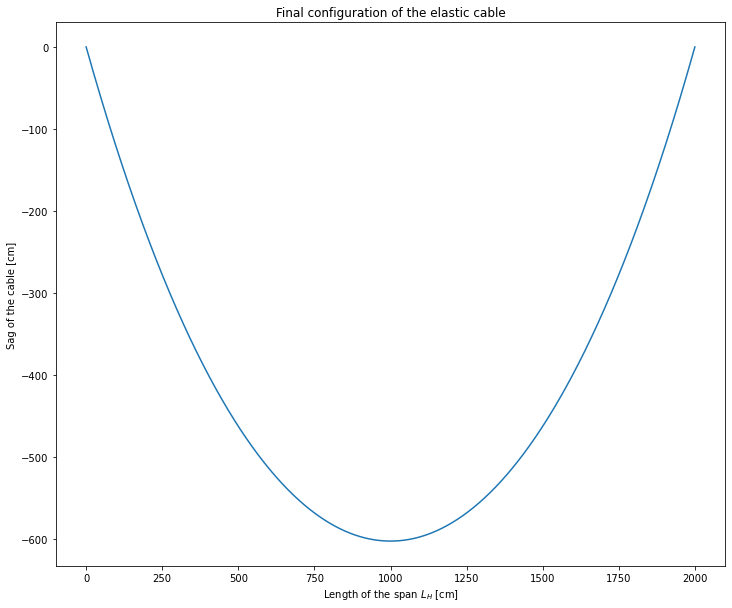

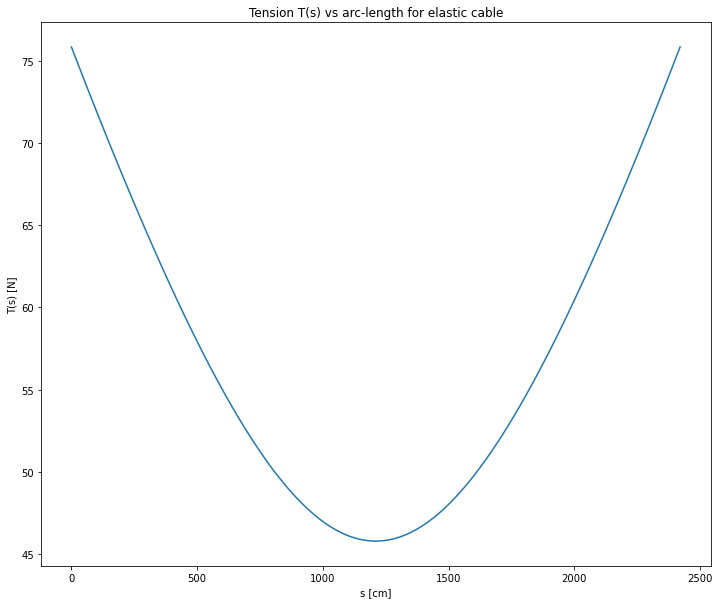

In [283]:
# Report
print("---------------------------------------------")
print("Results Report")
print("---------------------------------------------")
print(f"Horizontal force at the fair lead: {H:12.8f} [N]")
print(f"Vertical force at the fair lead: {V:12.8f} [N]")
print(f"Stretched length of the cable: {SF:12.8f}")
print(f"Stretching: {stretching}")
print(f"Error: {Error:14.12f}")
print(f"Number of iterations: {k}")
print(f"Maximum Sag: {max_sag}")
print(f"Maximum tensile force on the cable: {max_tension}")
# for s in range(len(S)):
#     x(s) = 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(figsize = (12, 10))
plt.title('Final configuration of the elastic cable')
plt.xlabel('Length of the span $L_{H}$ [cm]')
plt.ylabel('Sag of the cable [cm]')
plt.plot(X, Z)
fig.savefig('./figures/Final configuration of the cable.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(figsize = (12, 10))
plt.title('Tension T(s) vs arc-length for elastic cable')
plt.xlabel('s [cm]')
plt.ylabel('T(s) [N]')
plt.plot(S, Tension_s)
fig.savefig('./figures/tension T(s) vs arc-length.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show


#Va = Vb
#Final length should be bigger than the original length. We can get strech and deformation from origianl and new lenth.

### Question 2

In [284]:
# Plot tension (T) vs arc lenth

class Data:
    def __init__(self):
        self.m = 34.0275   #Mass
        self.g = 9.81
        self.H0 = -100.0
        self.L = 600
        self.XB = 589.61
        self.EA = 610e+7
        self.Iter = 200
        self.Tol = 1e-9
        self.InitialGuess_H = 100
        self.InitialGuess_V = 150

In [285]:
def Residue(DATA, X):
    mg = DATA.m * DATA.g
    EA = DATA.EA
    # EA = 610*10^7
    H = X[0]
    V = X[1]
    RES = np.zeros(2)
    RES[0] = H / mg * (np.arcsinh(V / H) - np.arcsinh((V - mg * DATA.L) / H)) + H * DATA.L / EA - DATA.XB
    RES[1] = H / mg * (-np.sqrt(1 + ((V - mg * DATA.L) / H)**2) + np.sqrt(1 + (V / H)**2)) + DATA.L / EA * (V - mg * DATA.L / 2) - DATA.H0
    return RES

In [286]:
def Jacobian(DATA, X):
    mg = DATA.m * DATA.g
    EA = DATA.EA
    H = X[0]
    V = X[1]
    JJ = np.zeros((2, 2))
    JJ[0, 0] = 1 / mg * (np.arcsinh(V / H) - np.arcsinh((-mg * DATA.L + V) / H)) + \
               H / mg * (-V / H**2 * (1 + 1 / H**2 * V**2)**(-0.5) + \
               (-mg * DATA.L + V) / H**2 * (1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5)) + DATA.L / EA
    JJ[0, 1] = H / mg * (1 / H * (1 + 1 / H**2 * V**2)**(-0.5) - \
               1 / H * (1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5))
    JJ[1, 0] = 1 / mg * (-np.sqrt(1 + (-mg * DATA.L + V)**2 / H**2) + \
               np.sqrt(1 + 1 / H**2 * V**2)) + H / mg * \
               ((1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5) * \
               (-mg * DATA.L + V)**2 / H**3 - \
               (1 + 1 / H**2 * V**2)**(-0.5) / H**3 * V**2)
    JJ[1, 1] = H / mg * (-(-mg * DATA.L + V) / H**2 * (1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5) + \
               V / H**2 * (1 + 1 / H**2 * V**2)**(-0.5)) + DATA.L / EA
    return JJ

In [287]:
# Main solver
DATA = Data()
Error = 1.0
XOLD = np.array([DATA.InitialGuess_H, DATA.InitialGuess_V])
k = 1

while Error > DATA.Tol and k < DATA.Iter:
    Res = Residue(DATA, XOLD)
    JJ = Jacobian(DATA, XOLD)
    DX = np.linalg.solve(JJ, -Res)
    Error = np.linalg.norm(DX, np.inf)
    XOLD = XOLD + DX
    k += 1

H, V = XOLD
L = DATA.L
mg = DATA.m * DATA.g
EA = DATA.EA
S = np.arange(0, DATA.L + 1, 1)
X = H / mg * (np.arcsinh((V - mg * (L - S)) / H) - np.arcsinh((V - mg * L) / H)) + H * S / EA
Z = H / mg * (np.sqrt(1 + ((V - mg * (L - S)) / H)**2) - np.sqrt(1 + ((V - mg * L) / H)**2)) + S / EA * (V - mg * L + 0.5 * mg * S)
SF = (np.log(V + np.sqrt(H**2 + V**2)) * H**2 + (2 * EA * L * mg) + np.sqrt(H**2 + V**2) * V) / (2 * EA * mg)
L_s = L - S
# V_B = mg * L
V_B = V
V_A = V - mg*L
weight_L_S = DATA.m * L_s
Tension_s = (np.sqrt(H**2 + (V_B - mg*(L_s[:]))**2) ) #At point s
# max_sag = 
delta_l = SF - L
stretching = delta_l/SF
print(H/100)
max_tension = max(Tension_s)


6788.266438861865


In [288]:
# Report
print("---------------------------------------------")
print("Results Report")
print("---------------------------------------------")
print(f"Horizontal force at the fair lead: {H:12.8f} [N]")
print(f"Vertical force at the fair lead: {V:12.8f} [N]")
print(f"Stretched length of the cable: {SF:12.8f}")
print(f"Error: {Error:14.12f}")
print(f"Number of iterations: {k}")
print(f"Elongation: {delta_l}")
print(f"Stretching: {stretching}")

print(f"Maximum tensile force on the cable: {max_tension}")


---------------------------------------------
Results Report
---------------------------------------------
Horizontal force at the fair lead: 678826.64388619 [N]
Vertical force at the fair lead: -15793.66724620 [N]
Stretched length of the cable: 601.51414136
Error: 0.000000016599
Number of iterations: 200
Elongation: 1.5141413634753462
Stretching: 0.002517216569577539
Maximum tensile force on the cable: 712387.5186340091


<function matplotlib.pyplot.show(close=None, block=None)>

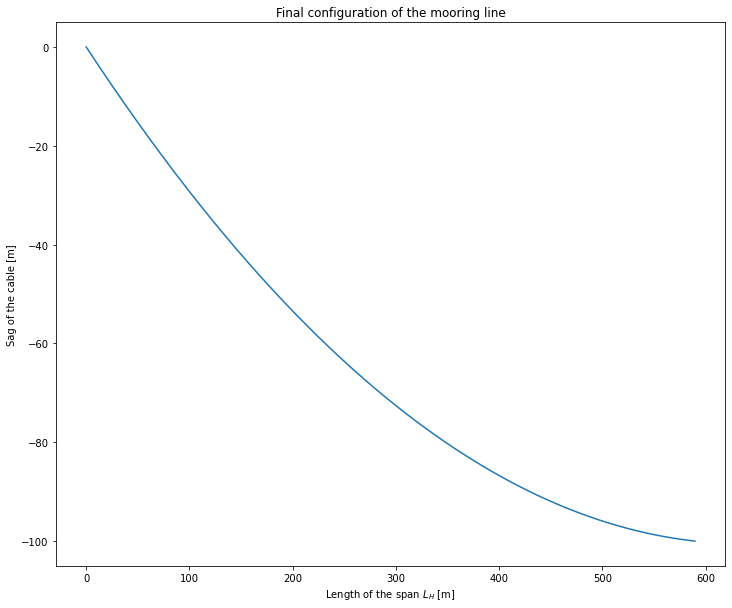

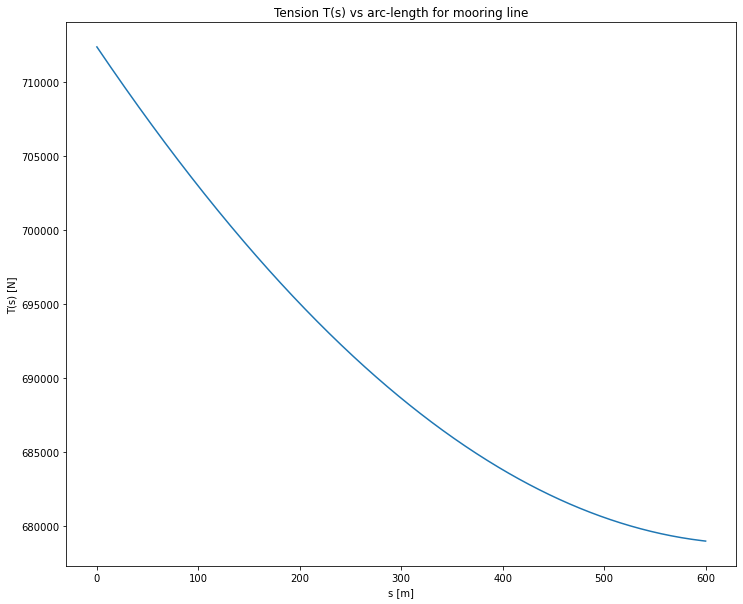

In [289]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(figsize = (12, 10))
plt.title('Final configuration of the mooring line')
plt.xlabel('Length of the span $L_{H}$ [m]')
plt.ylabel('Sag of the cable [m]')
plt.plot(X, Z)
fig.savefig('./figures/problem_2_Final configuration of the cable.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(figsize = (12, 10))
plt.title('Tension T(s) vs arc-length for mooring line')
plt.xlabel('s [m]')
plt.ylabel('T(s) [N]')
plt.plot(S, Tension_s)
fig.savefig('./figures/problem2_tension T(s) vs arc-length.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show


### From table

In [290]:
SF = 2420
L = 2420
delta_l = SF - L #Strech lenth minu L0

max_sag = abs(min(Z))
stretching = delta_l/SF  #delta L delt på strech lenth
print(delta_l)

print(stretching)

0
0.0
